<a href="https://colab.research.google.com/github/Rupasri20055/-Linear-Regression/blob/main/Task_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Load Dataset & Check Info**

In [2]:
# Load dataset
df = pd.read_csv("AmesHousing.csv")

# Check dataset shape and first 5 rows
print(df.shape)
print(df.head())

# Check for null values
print(df.isnull().sum())


(2930, 82)
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice

**Preprocessing — Handle Missing Values**

In [3]:
# Drop rows with missing values in 'SalePrice' or 'Gr Liv Area'
df = df.dropna(subset=['SalePrice', 'Gr Liv Area'])

# Confirm again
print(df.isnull().sum())


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


**Select Features and Target**

In [4]:
# Select independent and dependent variables
X = df[['Gr Liv Area']]    # Simple Linear Regression: one independent variable
y = df['SalePrice']


** Split into Train and Test Sets**

In [5]:
# Split data — 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(X_train.shape, X_test.shape)


(2344, 1) (586, 1)


**Fit Linear Regression Model**

In [6]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Predict on Test Set**

In [7]:
# Predict values
y_pred = model.predict(X_test)


**Evaluate Model**

In [8]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 41365.51131849474
Mean Squared Error: 3821184066.2726417
Root Mean Squared Error: 61815.72669048421
R² Score: 0.5233974153691151


**Plot Regression Line**

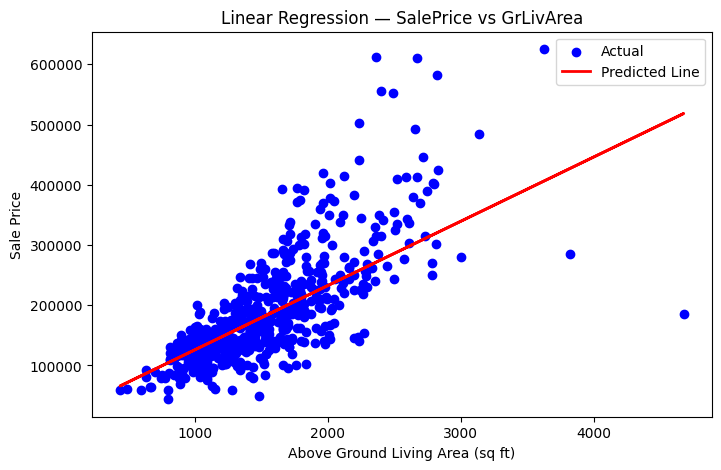

In [9]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Linear Regression — SalePrice vs GrLivArea")
plt.legend()
plt.show()


**Check Coefficients**

In [10]:
# Print intercept and coefficient
print("Intercept:", model.intercept_)
print("Slope (Coefficient for GrLivArea):", model.coef_[0])


Intercept: 19250.559555372573
Slope (Coefficient for GrLivArea): 106.72915508271505
